# Análisis de una solución de la ecuación del calor

La solución de la ecuación
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones de frontera:
$$u(0,t)=u(1,t)=0, \;\;\; t>0$$
Y la condición inicial:
$$u(x,0)=x,\;\;\;0<x<1$$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,t)=\frac{2}{\pi}\sum_{n=1}^{\infty} \frac{(-1)^{n+1}}{n}  \sin(n\pi x)e^{-(n\pi)^2 t}.$$

Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$.

In [ ]:
from pylab import *

Para empezar, graficamos la condición inicial.

In [ ]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = x[i]
    return y

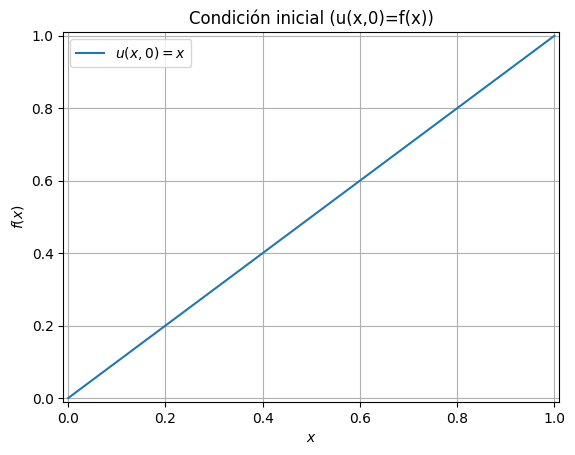

In [ ]:
x = linspace(0,1,1000)
f = recta(x)
plot(x,f,label='$u(x,0)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,1.01]),ylim([-0.01,1.01]),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=f(x)=x$.

In [ ]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += (-1)**(n+1)*sin(n*pi*x)/(n)
    return (2.0/pi)*f

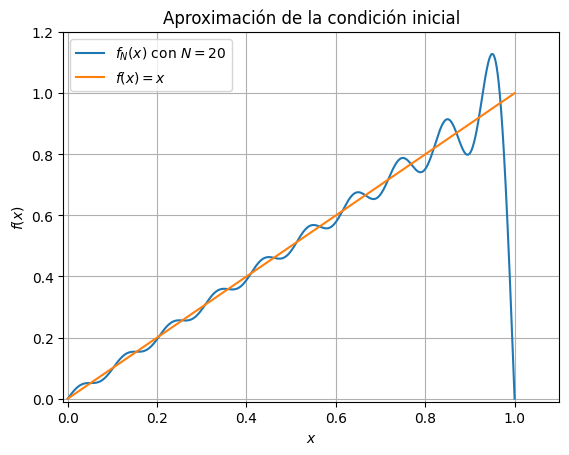

In [ ]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-0.01,1.2]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

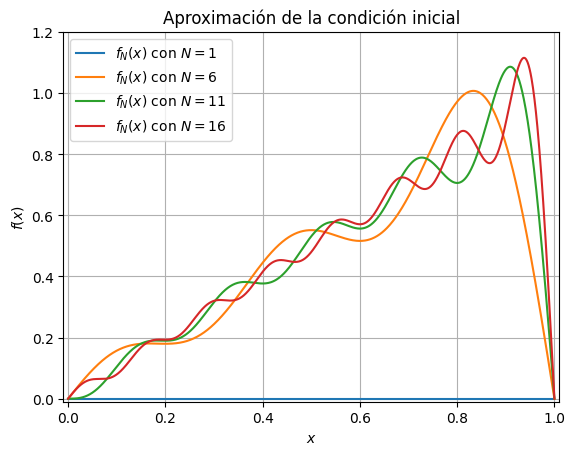

In [ ]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [ ]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (-1)**(n+1)*sin(n*pi*x)/(n)*exp(-n**2*pi**2*t[i])
    return (2.0/pi)*f

In [ ]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

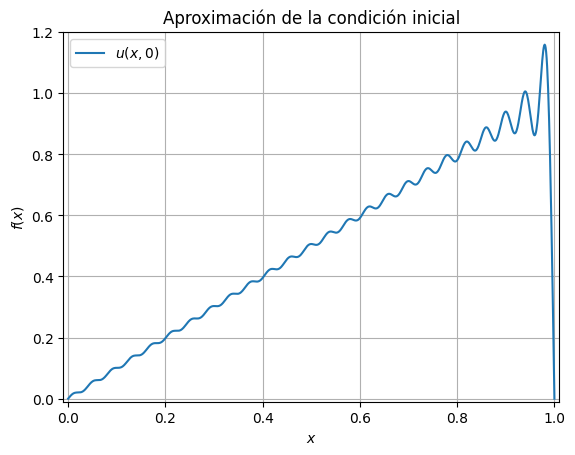

In [ ]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

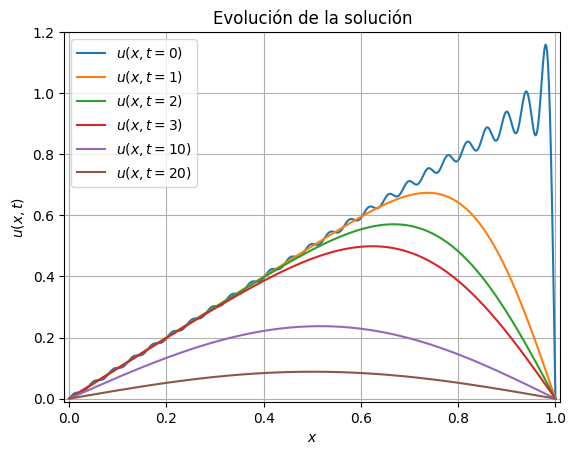

In [ ]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$');
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

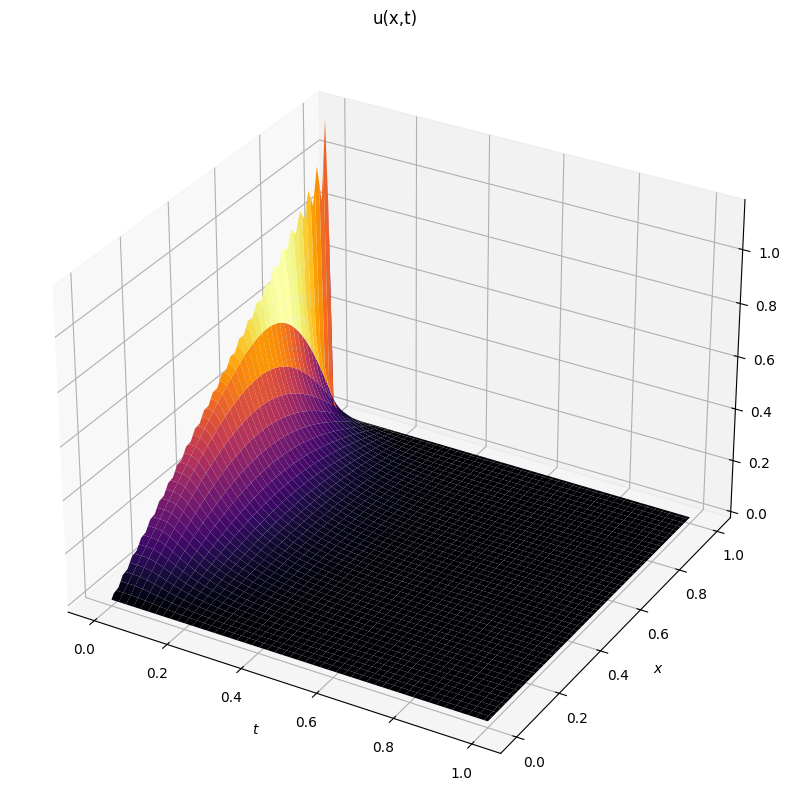

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$');
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno"); #Otros colores:"viridis", "inferno", "plasma"

Usando el método de separación de variables para resolver:



$$u_t(x,t)=u_x \;_x (1,t)=0,\;\;\;0<x<1, \;\;\; t>0$$

$$u_x(0,t)=0, \; \; u_x(1 ,t)=0 \;\;\;t>0$$


$$u(x,0)=f(x)=x, \;\;\;0<x<1, \;\;\; t>0$$

Se tiene lo siguiente
Dado que
𝑓
(
𝑥
)
=
𝑥
, sustituyamos esto: $$C_n = \int_0^1 x \cos(n\pi x) \, dx.$$
Caso
𝑛
=
0
: Si
𝑛
=
0
, tenemos que: $$C_0 = \int_0^1 x \cdot 1 \, dx = \left[\frac{x2}{2}\right]_01 = \frac{1}{2}.$$

Caso
𝑛
≥
1
: Para
𝑛
≥
1
, usamos integración por partes:

Sea
𝑢
=
𝑥
 y
𝑑
𝑣
=
cos
⁡
(
𝑛
𝜋
𝑥
)
𝑑
𝑥
. Entonces,
𝑑
𝑢
=
𝑑
𝑥
 y
𝑣
=
sin
⁡
(
𝑛
𝜋
𝑥
)
𝑛
𝜋
.

Aplicando integración por partes: $$C_n = \left[x \cdot \frac{\sin(n\pi x)}{n\pi}\right]_0^1 - \int_0^1 \frac{\sin(n\pi x)}{n\pi} dx.$$

Evaluemos el primer término:

En
𝑥
=
1
:
𝑥
⋅
sin
⁡
(
𝑛
𝜋
⋅
1
)
𝑛
𝜋
=
sin
⁡
(
𝑛
𝜋
)
𝑛
𝜋
=
0
 (porque
sin
⁡
(
𝑛
𝜋
)
=
0
).

En
𝑥
=
0
:
𝑥
⋅
sin
⁡
(
𝑛
𝜋
⋅
0
)
𝑛
𝜋
=
0
.

Por lo tanto, el primer término es cero. Ahora evaluemos el segundo término: $$\int_0^1 \frac{\sin(n\pi x)}{n\pi} dx = \frac{-\cos(n\pi x)}{(n\pi)^2} \Big|_0^1.$$

Evaluemos los límites:

En
𝑥
=
1
:
−
cos
⁡
(
𝑛
𝜋
)
(
𝑛
𝜋
)
2
=
−
(
−
1
)
𝑛
(
𝑛
𝜋
)
2
 (ya que
cos
⁡
(
𝑛
𝜋
)
=
(
−
1
)
𝑛
).

En
𝑥
=
0
:
−
cos
⁡
(
0
)
(
𝑛
𝜋
)
2
=
−
1
(
𝑛
𝜋
)
2
.

Entonces: $$\int_0^1 \frac{\sin(n\pi x)}{n\pi} dx = -\frac{(-1)n}{(n\pi)2} - \left(-\frac{1}{(n\pi)^2}\right) = \frac{1 - (-1)n}{(n\pi)2}.$$

Por lo tanto,
𝐶
𝑛
 es: $$C_n = \frac{1 - (-1)n}{(n\pi)2}.$$

Note que
1
−
(
−
1
)
𝑛
 es:

0
 si
𝑛
 es par.

2
 si
𝑛
 es impar.

Así que: $$C_n = \begin{cases} 0 & \text{si } n \text{ es par}, \\ \frac{2}{(n\pi)^2} & \text{si } n \text{ es impar}. \end{cases}$$


  se tiene:

$$u(x,t) = \frac{1}{2} + \sum_{n=1}^\infty \frac{(2(-1)^n-1)}{(n\pi)^2} \cos(n\pi x)e^{ (-n\pi)^2t}.$$


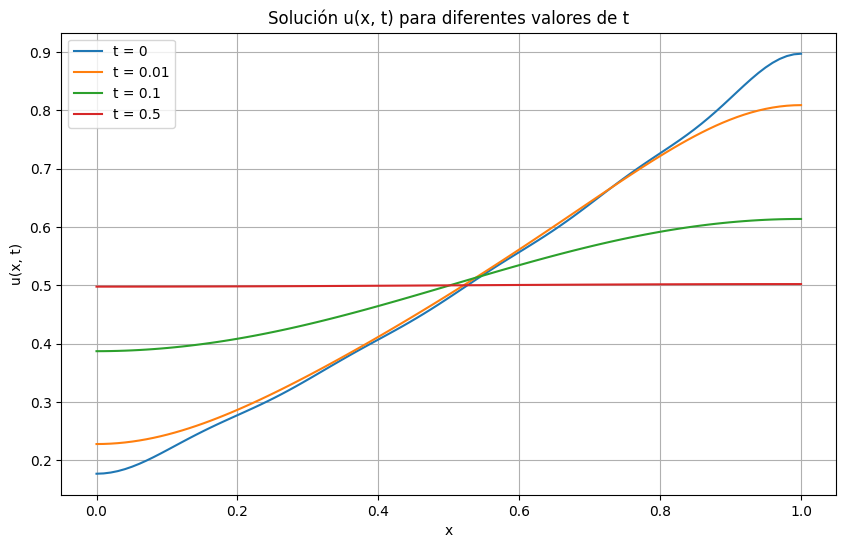

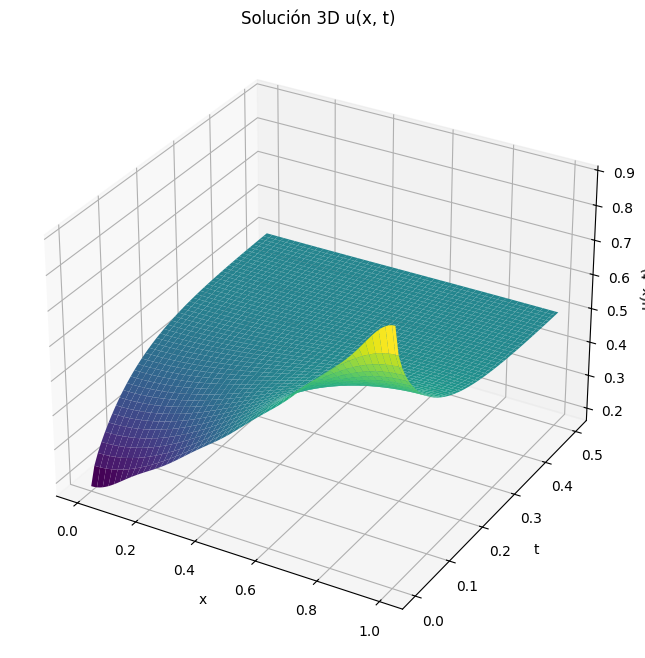

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función u(x, t)
def u(x, t, terms=10):
    result = 0.5  # Término constante
    for n in range(1, terms + 1):
        # Coeficiente para cada término
        Cn = (2 * (-1)**n - 1) / (n * np.pi)**2
        result += Cn * np.cos(n * np.pi * x) * np.exp(-(n * np.pi)**2 * t)
    return result

# Crear los puntos en x
x = np.linspace(0, 1, 100)

# Valores de t para graficar
t_values = [0, 0.01, 0.1, 0.5]  # Tiempos específicos

# Graficar u(x, t) para diferentes valores de t
plt.figure(figsize=(10, 6))
for t in t_values:
    plt.plot(x, u(x, t), label=f"t = {t}")
plt.title("Solución u(x, t) para diferentes valores de t")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.grid()
plt.show()

# Crear una gráfica 3D para u(x, t)
from mpl_toolkits.mplot3d import Axes3D

# Crear la malla de puntos
t = np.linspace(0, 0.5, 50)
X, T = np.meshgrid(x, t)
U = u(X, T)

# Gráfica 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, U, cmap="viridis")

# Etiquetas y título
ax.set_title("Solución 3D u(x, t)")
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u(x, t)")
plt.show()


·Gracias por tu atenciòn